In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/masixin/Documents/msfe/ie598/hw6/ccdefault.csv',header=0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-2]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
from sklearn.model_selection import cross_val_score
cross_pred_train=rf.predict(X_train)
cross_pred_test=rf.predict(X_test)
train_accuracy_cv = cross_val_score(rf,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf,X=X_test,y=y_test,cv=10,n_jobs=-1)
test_rs_cv = list(test_accuracy_cv)
train_rs_cv = list(train_accuracy_cv)

In [9]:
train_rs_cv

[0.8082191780821918,
 0.8122917437985931,
 0.8226582747130692,
 0.8162962962962963,
 0.8233333333333334,
 0.8062962962962963,
 0.8211111111111111,
 0.8191922934420156,
 0.8121526491293072,
 0.8091885883660616]

In [10]:
test_rs_cv

[0.7840531561461794,
 0.8166666666666667,
 0.8266666666666667,
 0.7966666666666666,
 0.8333333333333334,
 0.8,
 0.8066666666666666,
 0.8433333333333334,
 0.8166666666666667,
 0.822742474916388]

In [15]:
rf_60 = RandomForestClassifier(n_estimators=60)
rf_60.fit(X_train,y_train)
cross_pred_train=rf_60.predict(X_train)
cross_pred_test=rf_60.predict(X_test)
train_accuracy_cv = cross_val_score(rf_60,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_60,X=X_test,y=y_test,cv=10,n_jobs=-1)
train_rs_cv = list(train_accuracy_cv)
test_rs_cv = list(test_accuracy_cv)

In [13]:
train_rs_cv 

[0.8126619770455387,
 0.8100703443169197,
 0.828952239911144,
 0.8185185185185185,
 0.8244444444444444,
 0.8114814814814815,
 0.822962962962963,
 0.819933308632827,
 0.8125231567247129,
 0.8080770655798444]

In [14]:
test_rs_cv

[0.7807308970099668,
 0.8,
 0.8266666666666667,
 0.7933333333333333,
 0.8333333333333334,
 0.7966666666666666,
 0.7966666666666666,
 0.8433333333333334,
 0.8233333333333334,
 0.8260869565217391]

In [16]:
rf_85 = RandomForestClassifier(n_estimators=85)
rf_85.fit(X_train,y_train)
cross_pred_train=rf_85.predict(X_train)
cross_pred_test=rf_85.predict(X_test)
train_accuracy_cv = cross_val_score(rf_85,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_85,X=X_test,y=y_test,cv=10,n_jobs=-1)
train_rs_cv = list(train_accuracy_cv)
test_rs_cv = list(test_accuracy_cv)

In [17]:
train_rs_cv

[0.8130322102924843,
 0.8045168456127361,
 0.8308034061458719,
 0.8196296296296296,
 0.8255555555555556,
 0.8118518518518518,
 0.8233333333333334,
 0.8195628010374213,
 0.8165987402741757,
 0.8136346795109299]

In [18]:
test_rs_cv

[0.7973421926910299,
 0.8133333333333334,
 0.82,
 0.7966666666666666,
 0.8333333333333334,
 0.7866666666666666,
 0.8033333333333333,
 0.8433333333333334,
 0.8266666666666667,
 0.8361204013377926]

In [19]:
importances = rf_85.feature_importances_

Feature importance ranking:
1. feature 6 ID (0.094629)
2. feature 0 LIMIT_BAL (0.076070)
3. feature 5 SEX (0.058914)
4. feature 12 EDUCATION (0.058431)
5. feature 1 MARRIAGE (0.054254)
6. feature 13 AGE (0.053269)
7. feature 18 PAY_0 (0.050063)
8. feature 14 PAY_2 (0.050033)
9. feature 16 PAY_3 (0.049654)
10. feature 15 PAY_4 (0.049574)
11. feature 17 PAY_5 (0.049355)
12. feature 7 PAY_6 (0.045441)
13. feature 19 BILL_AMT1 (0.045369)
14. feature 20 BILL_AMT2 (0.044930)
15. feature 21 BILL_AMT3 (0.043040)
16. feature 22 BILL_AMT4 (0.042980)
17. feature 8 BILL_AMT5 (0.032175)
18. feature 10 BILL_AMT6 (0.021362)
19. feature 9 PAY_AMT1 (0.021272)
20. feature 3 PAY_AMT2 (0.019153)
21. feature 11 PAY_AMT3 (0.016211)
22. feature 4 PAY_AMT4 (0.013062)
23. feature 2 PAY_AMT5 (0.010759)


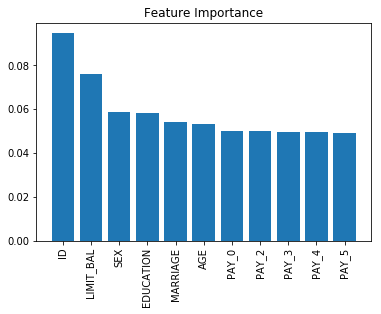

In [20]:
indices = np.argsort(importances)[::-1]
feature_name = X_test.columns.get_values()
print("Feature importance ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()

In [21]:
print("My name is {Sixin Ma}")
print("My NetID is: {sixinma2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Sixin Ma}
My NetID is: {sixinma2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
